# Predicting Income using Classification

#### By: Matthew Fernandez

## Introduction
Our goal in this notebook is to make predictions through an estimation of the probability that a person made less than or equal to 50K, and or greater during 1994. We will also be using Logistic Regression as another means to predict and compare the two models on how well they perform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB 

#### Interpret the data
This data set was taken from https://www.kaggle.com/uciml/adult-census-income. The data was accessed and obtained on May 1st, 2021.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/1994-census-summary.csv')

## Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   usid            32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       30725 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      30718 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  31978 non-null  object
 15  label           32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


This summary of the data frame shows that there are some missing values for columns like 'workclass', 'occupation', and 'native_country', so we will drop those individuals from the data set since the average missing values is only 4% of the total dataset.

In [4]:
df.dropna(axis =0, inplace = True)

In [5]:
df.isna().sum().sum()

0

Great, we no longer have Na values in our data so lets procede with processing the data.

In [6]:
df.describe()

,usid,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,16288.103242,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,9383.401676,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,8179.250000,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,16286.500000,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,24402.750000,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Column 'fnlwgt' is such a small number lets get ride of it aswell as 'usid' since it is simply the count per individual. How can someone work 1 hr per week? The data set consists of numerical variables and categorical variables

In [7]:
# We will drop 'education' since 'education_num' is the numerical encoded version.
df.drop(['usid', 'fnlwgt','education'], axis = 1, inplace =True)

What are the categorical variables?

In [8]:
# get column names that are Objects
categorical = [var for var in df.columns if df[var].dtype=='O'] 
print('The categorical variables are :\n', categorical)

The categorical variables are :
 ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'label']


Let us take a look at the frequencyies for each categorical data type

In [9]:
for var in categorical: 
    
    print(df[var].value_counts())

Private             22286
Self_emp_not_inc     2499
Local_gov            2067
State_gov            1279
Self_emp_inc         1074
Federal_gov           943
Without_pay            14
Name: workclass, dtype: int64
Married_civ_spouse       14065
Never_married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married_spouse_absent      370
Married_AF_spouse           21
Name: marital_status, dtype: int64
Prof_specialty       4038
Craft_repair         4030
Exec_managerial      3992
Adm_clerical         3721
Sales                3584
Other_service        3212
Machine_op_inspct    1966
Transport_moving     1572
Handlers_cleaners    1350
Farming_fishing       989
Tech_support          912
Protective_serv       644
Priv_house_serv       143
Armed_Forces            9
Name: occupation, dtype: int64
Husband           12463
Not_in_family      7726
Own_child          4466
Unmarried          3212
Wife               1406
Other_relative      8

The column education_num is the numerical correlated data set to the education, so we will use just education_num for a numerical data type

## Data Exploration

What is correlation to workclass and age from the dataset?

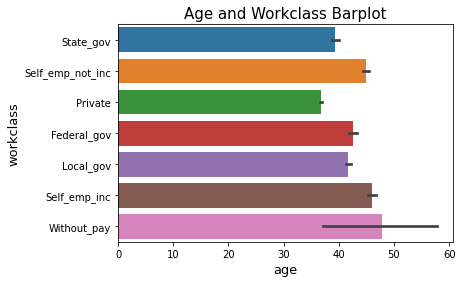

In [10]:
sns.barplot(x='age', y='workclass', data=df)
plt.xlabel('age', fontsize=13)
plt.ylabel('workclass', fontsize=13)
plt.title('Age and Workclass Barplot', fontsize=15);

This bar plot shows that there is almost an even distribution of workclass types in the dataset.

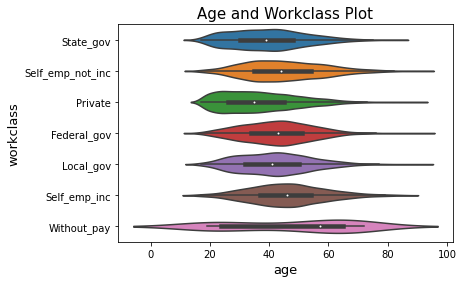

In [11]:
sns.violinplot(x='age', y='workclass', data= df)
plt.xlabel('age', fontsize=13)
plt.ylabel('workclass', fontsize=13)
plt.title('Age and Workclass Plot', fontsize=15);

This violin plot shows shows us that the average age per individual is around 40 years of age. Also, note that the category 'without_pay' goes below that age range, how is this even possible?

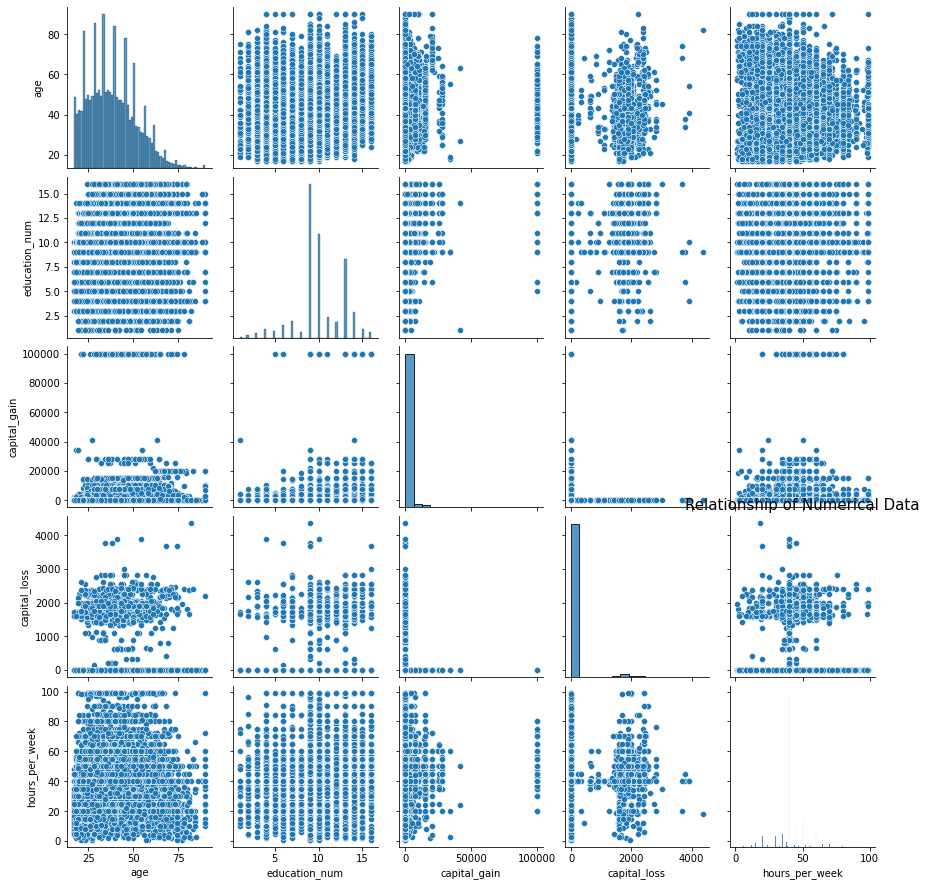

In [12]:
categorical_Variables = df[['age','education_num', 'capital_gain', 'capital_loss', 'hours_per_week']]
sns.pairplot(data = categorical_Variables)
plt.title('Relationship of Numerical Data', fontsize= 15);

From this plot we see that education and capitol gain are correlated, showing that those with a higher education tend to have profit in investment or sale of property. Capitol gain is the based on profit from 'the sale of property or an investment', therefore one might be provoked to assume that these individuals have an income greater than 50K, but we'll clerify this assumption in the machine learning section. Noitce also that hours per week is most frequently 40 hrs as this is full time for individuals.

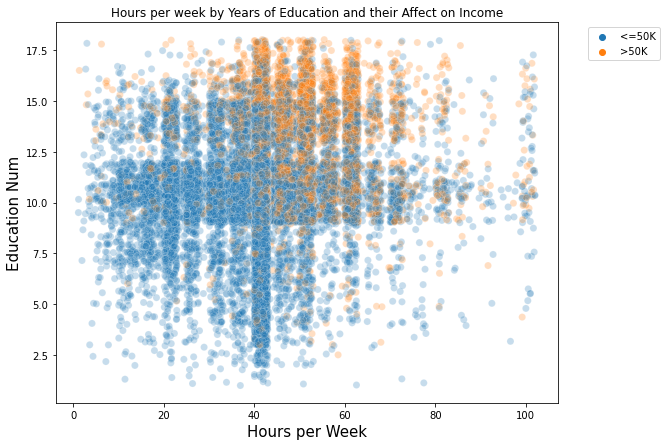

In [23]:
plt.figure(figsize=(9,7))
df['x'] = df['hours_per_week'] + np.random.rand(df.shape[0])*3
df['y'] = df['education_num']  + np.random.rand(df.shape[0])*2
plot1 = sns.scatterplot(x='x', y='y', data=df, hue='label', s=50, alpha=.25)
plt.title('Hours per week by Years of Education and their Affect on Income')
plt.xlabel('Hours per Week', fontsize=15)
plt.ylabel('Education Num', fontsize=15)
plt.legend( bbox_to_anchor = (1.05, 1.0), loc='upper left');

The above scatterplot overlays the two target variables of >50K and <=50K, with respect to the hours the individuals work and their education by numer, the higher the number the higher the education. We see that the individuals that make over 50K typically work 40 to 80 hours per week and have an education of 12.5 and up. The individuals who make less than 50K typically work 40 or less hours and have an education less than 14.

Lets now use Ordinal encoding on the categorical data, this will allow us to use the data in our Naive Bayes Classification model.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal encoding for categorical variables
# All encoded variables will be in ascending order

# workclass dictionary
WorkClass_dict = {'Without_pay':1, 'Federal_gov':2, 'Self_emp_inc':3, 'State_gov':4, 
             'Local_gov':5, 'Self_emp_not_inc':6, 'Private':7}
df['workclass'] = df.workclass.map(WorkClass_dict)

# marital status dictionary
marital_status_dict = {'Married_AF_spouse':1, 'Married_spouse_absent':2, 'Widowed':3, 'Separated':4, 'Divorced':5, 
             'Never_married':6, 'Married_civ_spouse':7}
df['marital_status'] = df.marital_status.map(marital_status_dict)
# occupation dictionary
occupation_dict = {'Armed_Forces':1, 'Priv_house_serv':2, 'Protective_serv':3, 'Tech_support':4,
                   'Farming_fishing':5, 'Handlers_cleaners':6, 'Transport_moving':7, 'Machine_op_inspct':8,
                   'Other_service':9, 'Sales':10, 'Adm_clerical':11, 'Exec_managerial':12, 
                   'Craft_repair':13, 'Prof_specialty':14}
df['occupation'] = df.occupation.map(occupation_dict)
# relationship dictionary
relationship_dict = {'Other_relative':1, 'Wife':2, 'Unmarried':3, 'Own_child':4, 'Not_in_family':5, 'Husband':6}
df['relationship'] = df.relationship.map(relationship_dict)
# race dictionary
race_dict = {'Other':1, 'Amer_Indian_Eskimo':2, 'Asian_Pac_Islander':3, 'Black':4, 'White':5}
df['race'] = df.race.map(race_dict)
# sex dictionary
sex_dict = {'Female':1, 'Male':2}
df['sex'] = df.sex.map(sex_dict)
# native_country dictionary
native_country_dict = {'Holand_Netherlands':1, 'Scotland':2, 'Honduras':3, 'Hungary':4,
                   'Outlying_US(Guam_USVI_etc)':5, 'Yugoslavia':6, 'Laos':7, 'Thailand':8,
                   'Trinadad&Tobago':9, 'Cambodia':10, 'Hong':11, 'Ireland':12, 
                   'Ecuador':13, 'France':14, 'Greece':15, 'Peru':16, 'Nicaragua':17, 'Portugal':18, 
                   'Taiwan':19, 'Iran':20, 'Haiti':21, 'Poland':22, 'Columbia':23, 'Japan':24, 
                   'Guatemala':25, 'Vietnam':26, 'Dominican_Republic':27, 'Italy':28, 'China':29,
                   'South':30, 'Jamaica':31, 'England':32, 'Cuba':33, 'El_Salvador':34, 'India':35, 
                   'Canada':36, 'Puerto_Rico':37, 'Germany':38, 'Philippines':39, 'Mexico':40, 'United_States':41}
df['native_country'] = df.native_country.map(native_country_dict)
# labels dictionary
label_dict = {'>50K':1, '<=50K':2}
df['label'] = df.label.map(label_dict)

Are the labels imbalanced?

In [ ]:
df['label'].value_counts()

Our data is inbalanced, meaning that are roughly a factor of 3 times the amount of individuals whom make <=50K as opposed to individuals who make >50K. 

Sanity check to see if we now have all numerical data types.

In [ ]:
df.info()

As we can see, our data set now consists of numerical data types. The data is now able to be used with our Naive Bayes Classification model.

## Machine Learning 

### Naive Bayes Classification
Let's do some machine learning based on all the columns and see how our model performs. Our expected value is labeled y which corresponds to the 'label' since this is a supervised algorithm. We will split the data set 70/30 for training data and test data that we will not touch until our model's accuracy is fine tunned.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis =1).values # Give us all the predictors exept the labeled data
y = df['label'].values
# split the test data 30% and 70% for training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# Create our Naive Bayes Classification model and fit it to the training data
clf = CategoricalNB().fit(X_train, y_train) 
# predict class values from test data
y_pred = clf.predict(X_test)
# predict class probabilities
clf = CategoricalNB().fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

Before we go any further, let's compare our blind prediction to the models test accuracy.

In [ ]:
blind_pred = df['label'].value_counts().index[0] # index[0] needed to match length of arrays
baseline_accuracy = (y_test == blind_pred).mean() # how we calc blind prediction
test_accuracy = (y_test == y_pred).mean() # how we obtain val for test accuracy
print('Baseline accuracy: {:.3f} ' .format(baseline_accuracy))
print('test accuracy: {:.3f}'.format(test_accuracy))

Our model does a better prediction than blidly predicting if an individual makes more or less than 50K by roughly 11%. We'll now take a look at how well the training and test scores compare. 

In [ ]:
print('Training set score: {:.3f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(clf.score(X_test, y_test)))

Awesome, our values we got from the training and test set accuracy are very similar, this means that we do not have overfitting.

A confusion matrix will give us a clear image of our Naive Bayes classification model and the type of error made, let us take a look.

In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix based on the actual values and our predicted values
confMatrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=confMatrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=15);


print('True Positives = ', confMatrix[0,0])
print('True Negatives = ', confMatrix[1,1])
print('\nFalse Positives = ', confMatrix[0,1])
print('False Negatives = ', confMatrix[1,0])
print('\n')

By this confusion matrix, we can read that we have 7750 correct predictions and 1299 wrong predictions. Not bad but 

What are the best features from the model?

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 7))
plt.title('Feature importances', fontsize=17)
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xlabel('Feature by Index', fontsize=13)
plt.xlim([-1, X_test.shape[1]])
plt.show()

This Plot shows us the importance of each feature in the Naive Bayes model by index. The last 2 features are least significant at predicting an individuals income, so lets now drop those columns in our new classifier.

In [ ]:
X = df.drop(['hours_per_week', 'native_country', 'label'], axis =1).values # Give us all the predictors exept the labeled data
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
clf = CategoricalNB().fit(X_train, y_train) 
y_pred = clf.predict(X_test)
clf = CategoricalNB().fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

How well does our test set perform now that we have found the optimal features?

In [ ]:
test_accuracy = (y_test == y_pred).mean() # how we obtain val for test accuracy
print('test accuracy: {:.3f}'.format(test_accuracy))

Wow, our test accuracy went down slightly, so well stick with the original model since it performed well.

In [ ]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 2)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Naive Bayes Classifier for Predicting Salaries', fontsize=15)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=13)
plt.show()

Receiver Operating Characteristic is a method to compare our classifier performance, With this ROC curve, we'd like to have a higher value for the area under the curve. We can choose a threshold that brings balance to our Naive Bayes Classification model. Let's check what we obtain with this model now.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.3f}'.format(roc_auc))

We obtained a value of 0.78 for the area under the curve of the ROC, since this value is close to 1, we can conclude that our model performs well at predicting an individuals income of <=50K or >50K.

### Logisitic Regression
We will now use Logisitic Regression as another means to predict an individuals income.

In [ ]:
# This takes some time due to the number of iterations the model needs for the solver to converge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
# We will use default parameters initally and fit the model to the training data
X = df.drop(['label'], axis =1).values # Give us all the predictors exept the labeled data
y = df['label'].values
# split the test data 30% and 70% for training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
# train our model and fit it to the training set
# max iterations could not be the default value, needed a much larger number to converge 
reg = LogisticRegression(max_iter=10000).fit(X_train, y_train) 

How well does our model predict the income > or <= 50K per individual?

In [ ]:
from sklearn.metrics import mean_squared_error 
# predict the acutal values on test set with model
y_pred = reg.predict(X_test) 
# test accuracy of model
test_accuracy = (y_test == y_pred).mean() # how we obtain val for test accuracy
print('Test accuracy: {:.3f}'.format(test_accuracy))
# #  RMSE of model on the test data
# print('RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))))
# R-squared value of model (on the training data)
print('r-squared: {:.3f}'.format(reg.score(X_train,y_train)))

Logistic regression performs well for our prediction of an individual's income, roughly 83% of the time our model predicts correctly. In the case of Logistic regression, we'd like to have a larger r-squared value so that we can more accurately measure how the model predicts the income of an individual. The r-squared value is associated with the percent of variance explained in our model. We obtained a value of 0.84, which tells us that 84% of the data fit the classification model.

In [ ]:
print('Training set score: {:.3f}'.format(reg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(reg.score(X_test, y_test)))

Our Logisitc regression model does well on the training and test set data because these score values are off only by 100th of a decimal.

In [ ]:
# confusion matrix based on the actual values and our predicted values
confMatrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=confMatrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=15);


print('True Positives = ', confMatrix[0,0])
print('True Negatives = ', confMatrix[1,1])
print('\nFalse Positives = ', confMatrix[0,1])
print('False Negatives = ', confMatrix[1,0])
print('\n')

This confusion matrix has a greater combined False values as opposed to the Naive Bayes method. Let us try and make our model more accurate by the use of feature selection.

How can we select the top k most relevant features? We will us use Feature selection using Correlation metric.

In [ ]:
# Source: https://towardsdatascience.com/how-to-perform-feature-selection-for-regression-problems-c928e527bbfa
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index", fontsize=13)
plt.ylabel("F-value (transformed from the correlation values)", fontsize=13)
plt.title('Feature Selection', fontsize=16)
plt.show()

The above plot shows that the third and fourth features are the most important. The y-axis shows the F-value found for the correlation values. So let's now pick those two features with a new model and test how our model performs.

How does the precision recall curve turnout?

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(reg, X_test, y_test) 
plt.title('Precision-Recall curve', fontsize=16)
plt.ylabel('Precision', fontsize=13)
plt.xlabel('Recall', fontsize=13);

This Precision-Recall curve shows us that the average precision(AP) across all thresholds is .95, which is good. Also, our optimal value is around .89 for Precision and .9 for Recall, both of these values are high so we can be sure that our model has low false positive rates and low false-negative rates. Great!

How would a new logisitic regression model preform with the most significant features?

In [ ]:
# We will use default parameters initally and fit the model to the training data
predictors = ['age', 'education_num', 'marital_status', 'relationship', 'sex', 'capital_gain', 'capital_loss', 'native_country']
X = df[predictors].values # Give us all the predictors exept the labeled data
y = df['label'].values
# split the test data 30% and 70% for training 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# train our model and fit it to the training set
reg = LogisticRegression(max_iter=10000).fit(X_train, y_train) 
y_pred = reg.predict(X_test)

In [ ]:
test_accuracy = (y_test == y_pred).mean() # how we obtain val for test accuracy
print('test accuracy: {:.3f}'.format(test_accuracy))

Our test accuracy has rounded up, the new features made a very small difference but nonetheless, our model benefits from these features.

How does our old confusion matrix compare to the new models confusion matrix?

In [ ]:
# confusion matrix based on the actual values and our predicted values
confMatrix = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=confMatrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=15);


print('True Positives = ', confMatrix[0,0])
print('True Negatives = ', confMatrix[1,1])
print('\nFalse Positives = ', confMatrix[0,1])
print('False Negatives = ', confMatrix[1,0])
print('\n')

We actually obtain 6 fewer false values, meaning our model is doing better at predicting with the more significant features that we used for the new model. We are now predicting better than we were with the old Logistic Regression model.

## Conclusion
Naive Bayes performs well at predicting an individual's income as opposed to Logistic Regression. Naive Bayes performed slightly better at predicting an individual's income, logistic regression is a good predictor method but always go for what is better at test accuracy so Naive Bayes classification wins. It was interesting to see that although we chose the most significant features for naive Bayes, our model's test accuracy did not improve, instead, it went down, this is because our feature's overall help and removing them in this case, was detrimental to our model's test accuracy. Logistic regression on the other hand performed better when we chose the features that were most significant to predicting an individual's income, but only by 100th of a decimal place.